<h1><center>Cancer Disease Prediction System Using Machine Learning</center></h1>

<img src="../Cancer Prediction/cancer.jpg" width="800" height="400">

## The problem statement is that we need to predict those people who are prone to have Cancer Disease with respect to different parameters such as their `Age`, `Gender`, `Alcohol Use`, `Genetic Risk` and `Smoking`.

## Importing useful Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")

* **There is also imbalance in data, so let's see how we train and predict with this dataset.**

In [2]:
# Importing our Dataset

cancer_patient = pd.read_excel("cancer_patient.xlsx")
cancer_patient.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [3]:
len(cancer_patient)

1000

In [4]:
cancer_patient.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

### Data is already clean, no null values so let's analyse further

In [5]:
cancer_patient.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


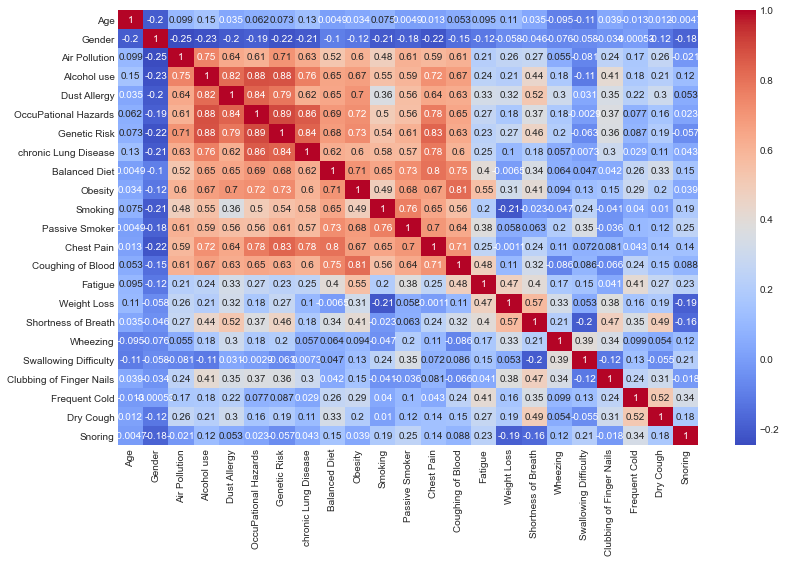

In [6]:
fig = plt.figure(figsize = (13,8))
sns.heatmap(cancer_patient.corr(),cmap='coolwarm',annot=True);

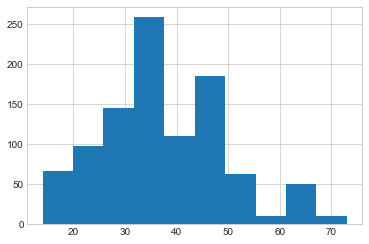

In [7]:
fig, ax = plt.subplots()
hist = ax.hist(x = cancer_patient["Age"]);

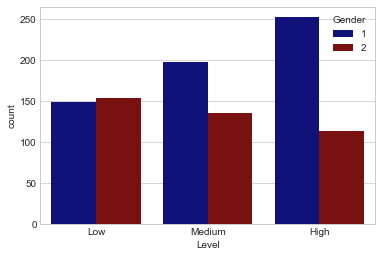

In [8]:
#Required outside of function. This needs to be activated first when plotting in every code block
fig, ax = plt.subplots()

#Count plot
plot = sns.countplot(data = cancer_patient, x='Level', hue='Gender', palette=['darkblue','darkred'])

In [9]:
cancer_patient.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

**Cancer found in people age over 50**

In [10]:
cancer_over50 = cancer_patient[cancer_patient["Age"] > 50]
cancer_over50.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
6,P103,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
11,P108,64,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
15,P111,73,1,5,6,6,5,6,5,6,...,4,3,6,2,1,2,1,6,2,Medium
21,P117,53,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
22,P118,62,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


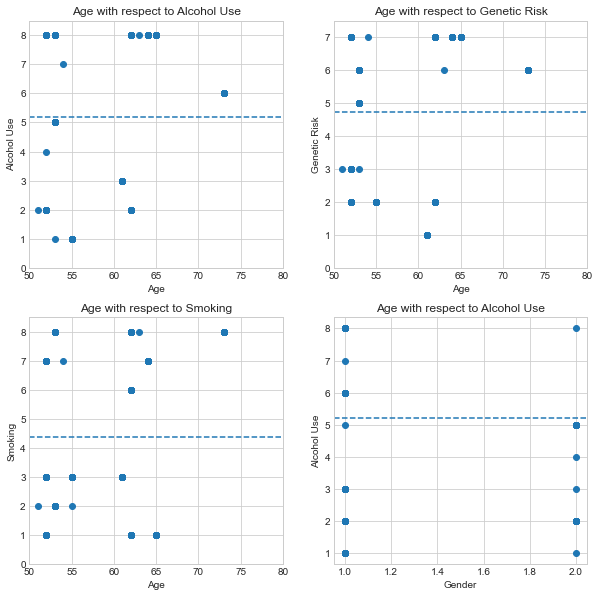

In [11]:
# Making Subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols= 2, figsize=(10, 10))

# Adding Data to the plot
scatter = ax1.scatter(x = cancer_over50["Age"], y = cancer_over50["Alcohol use"], cmap = "winter")

# For Plot ax1
ax1.set(title = "Age with respect to Alcohol Use", 
        xlabel = "Age", 
        ylabel = "Alcohol Use")
ax1.axhline(cancer_over50["Alcohol use"].mean(),
           linestyle = "--");
ax1.set_xlim([50, 80])
ax1.set_ylim([0, 8.5])

# For Plot ax2
scatter = ax2.scatter(x = cancer_over50["Age"], y = cancer_over50["Genetic Risk"])
ax2.set(title = "Age with respect to Genetic Risk", xlabel = "Age", ylabel = "Genetic Risk")
ax2.axhline(cancer_over50["Genetic Risk"].mean(),
           linestyle = "--");
ax2.set_xlim([50, 80])
ax2.set_ylim([0, 7.5])

# For Plot ax3
scatter = ax3.scatter(x = cancer_over50["Age"], y = cancer_over50["Smoking"])
ax3.set(title = "Age with respect to Smoking", xlabel = "Age", ylabel = "Smoking")
ax3.axhline(cancer_over50["Smoking"].mean(),
           linestyle = "--");
ax3.set_xlim([50, 80])
ax3.set_ylim([0, 8.5])

# For Plot ax4
scatter = ax4.scatter(x = cancer_over50["Gender"], y = cancer_over50["Alcohol use"])
ax4.set(title = "Age with respect to Alcohol Use", xlabel = "Gender", ylabel = "Alcohol Use")
ax4.axhline(cancer_over50["Alcohol use"].mean(),
           linestyle = "--");

In [12]:
cancer_over50.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
6,P103,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
11,P108,64,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
15,P111,73,1,5,6,6,5,6,5,6,...,4,3,6,2,1,2,1,6,2,Medium
21,P117,53,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
22,P118,62,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [13]:
len(cancer_patient), len(cancer_over50)

(1000, 134)

**There are only 134 patients who are Over 50 so we analyse the entire data irresespective of age to achieve fruitfull results later.**

In [14]:
cancer_patient.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

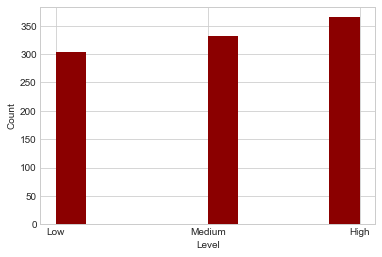

In [15]:
fig, ax = plt.subplots()

histt = ax.hist(x = cancer_patient["Level"], bins = 10, color ='darkred')

ax.set(xlabel = "Level", ylabel = "Count");

In [16]:
cancer_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

### As we can see `Level` dtype is not int so first we replace it with numbers then into type int

In [17]:
cancer_patient["Level"].replace(["Low", "Medium", "High"], ["0", "1", "2"], inplace=True)

In [18]:
cancer_patient["Level"] = cancer_patient["Level"].astype(int)

In [19]:
cancer_patient.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                5 non-null      object
 1   Age                       5 non-null      int64 
 2   Gender                    5 non-null      int64 
 3   Air Pollution             5 non-null      int64 
 4   Alcohol use               5 non-null      int64 
 5   Dust Allergy              5 non-null      int64 
 6   OccuPational Hazards      5 non-null      int64 
 7   Genetic Risk              5 non-null      int64 
 8   chronic Lung Disease      5 non-null      int64 
 9   Balanced Diet             5 non-null      int64 
 10  Obesity                   5 non-null      int64 
 11  Smoking                   5 non-null      int64 
 12  Passive Smoker            5 non-null      int64 
 13  Chest Pain                5 non-null      int64 
 14  Coughing of Blood         5 no

#### Above entire data is in `int`

**Plotting with respect to `Age` and `Genetic Risk`**

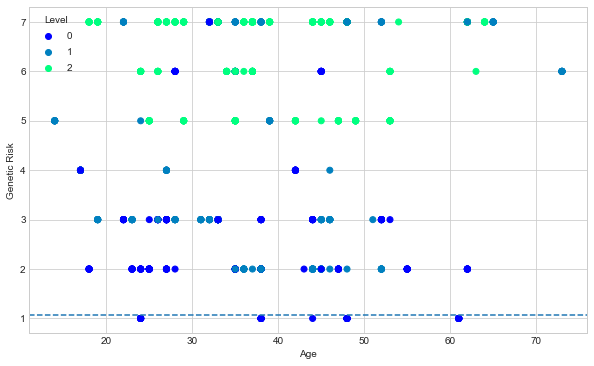

In [20]:
fig, ax = plt.subplots(figsize = (10, 6));

scatter = ax.scatter(x = cancer_patient["Age"], 
                     y = cancer_patient["Genetic Risk"],
                     c = cancer_patient["Level"],
                     cmap = "winter")

ax.set(xlabel = "Age", 
       ylabel = "Genetic Risk");

ax.legend(*scatter.legend_elements(), title = "Level");

ax.axhline(cancer_patient["Level"].mean(),
           linestyle = "--");

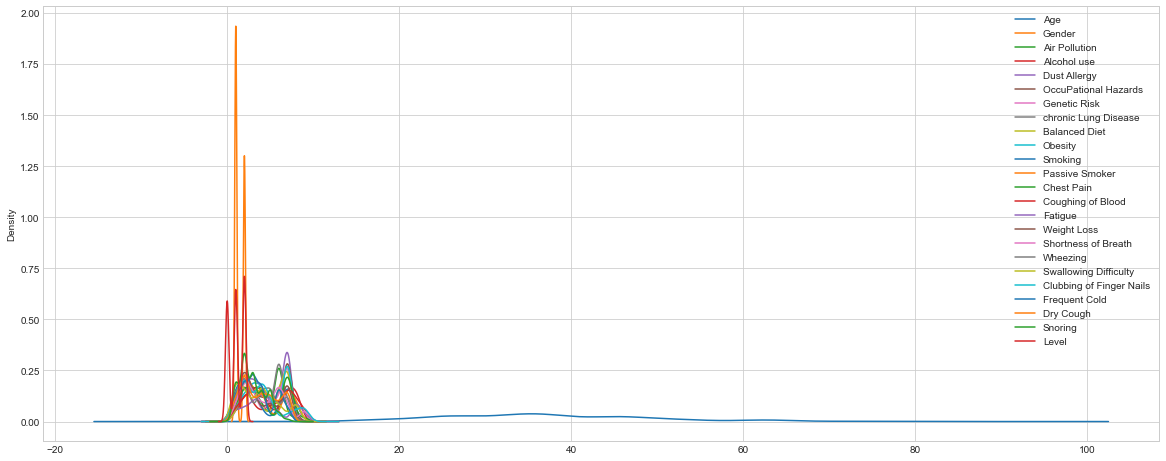

In [21]:
cancer_patient.plot.kde(figsize = (20,8));

In [22]:
np.array([cancer_patient["Gender"][:10]])

array([[1, 1, 1, 1, 1, 1, 2, 2, 2, 1]], dtype=int64)

**Number of `Male` & `Females`**

In [23]:
male = 0
female = 0
for i in cancer_patient["Gender"]:
    if i == 1:
        male += 1
    elif i == 2:
        female += 1
f"Number of Male: {male}, Number of females: {female}"

'Number of Male: 598, Number of females: 402'

In [24]:
# Make a histogram here
cancer_patient_male = cancer_patient[cancer_patient["Gender"] == 1]
cancer_patient_male.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [25]:
cancer_patient_female = cancer_patient[cancer_patient["Gender"] == 2]
cancer_patient_female.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
6,P103,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
7,P104,28,2,3,1,4,3,2,3,4,...,3,2,2,4,2,2,3,4,3,0
8,P105,35,2,4,5,6,5,6,5,5,...,1,4,3,2,4,6,2,4,1,1
11,P108,64,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,2
12,P109,39,2,4,5,6,6,5,4,6,...,5,3,2,4,3,1,7,5,6,1


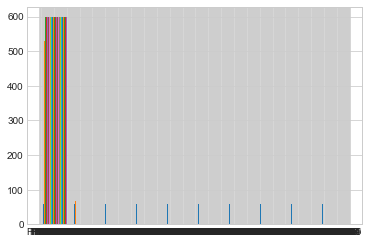

In [26]:
plt.hist(cancer_patient_male);

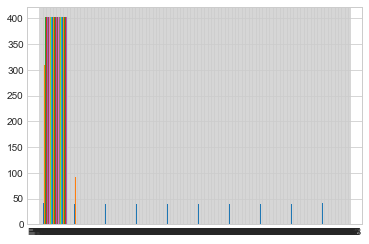

In [27]:
plt.hist(cancer_patient_female);

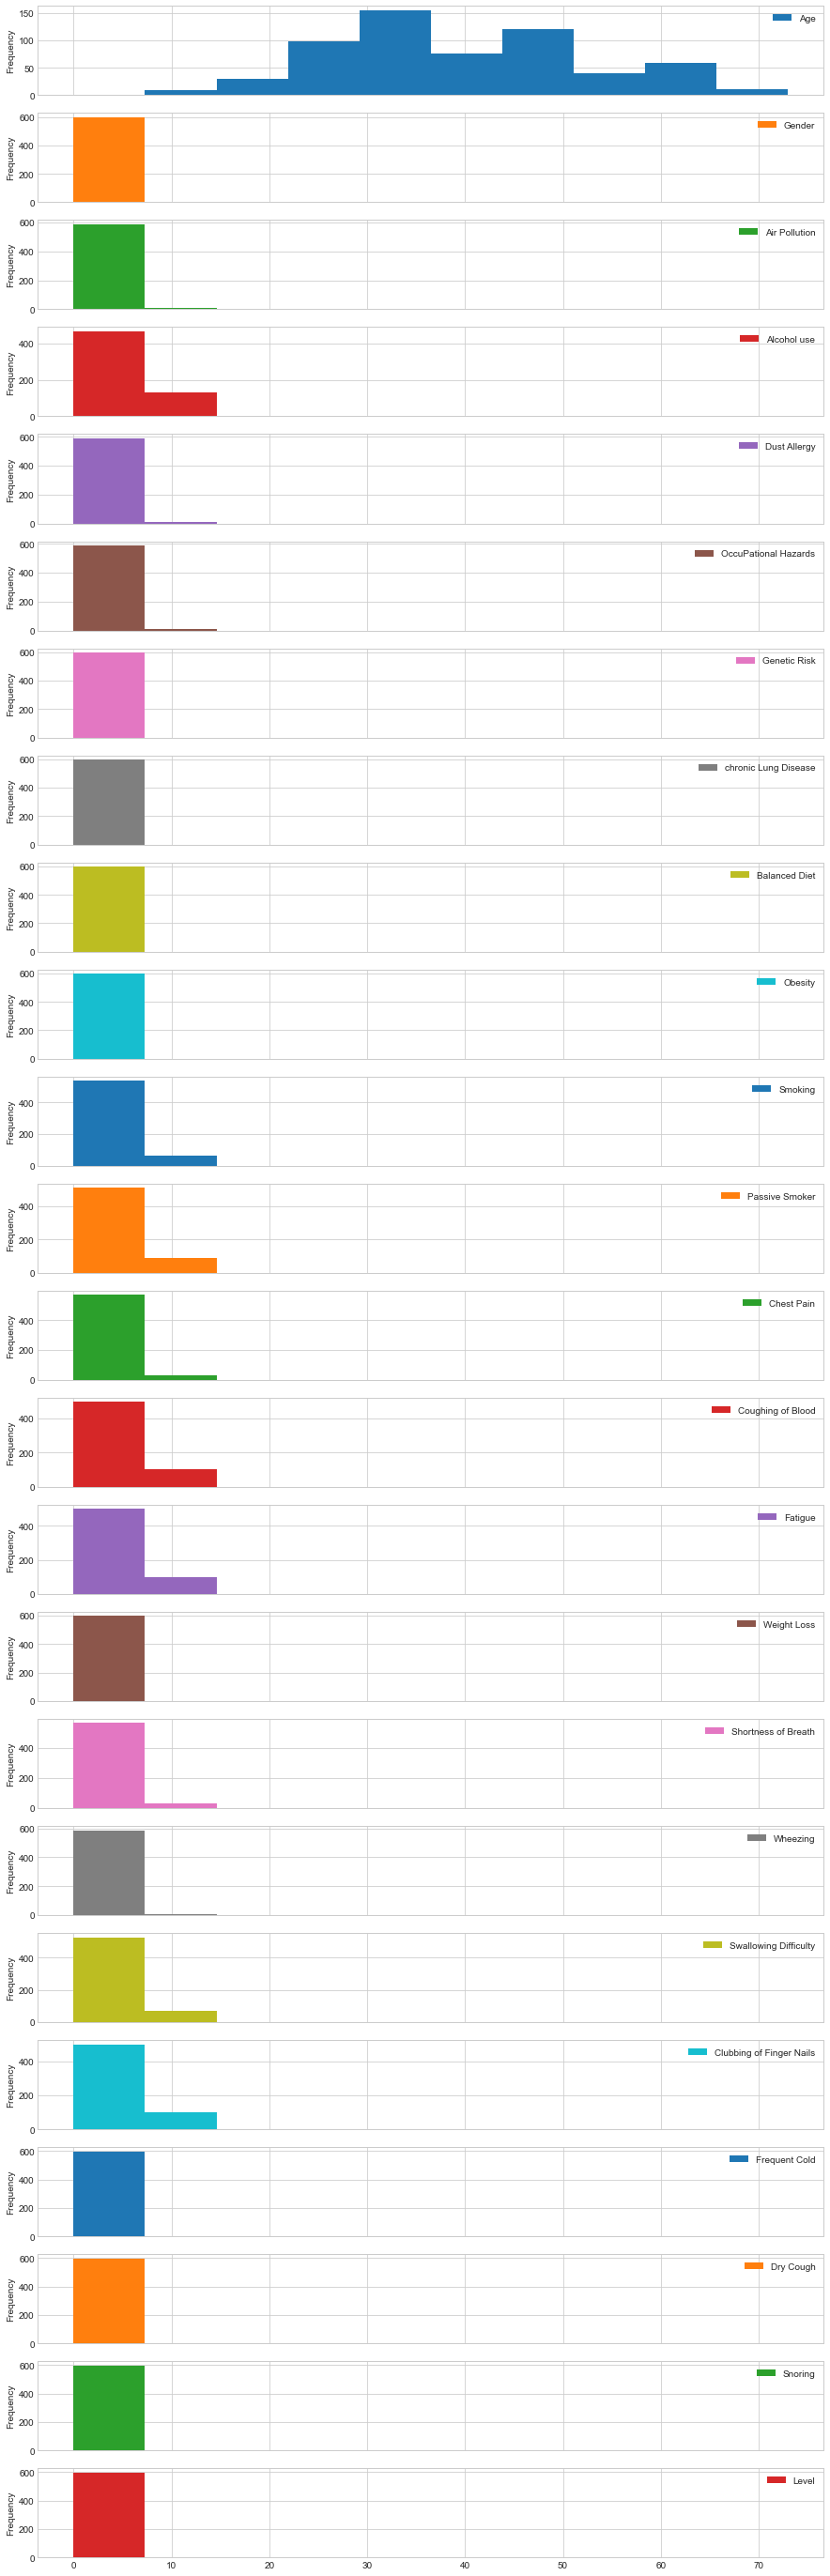

In [28]:
cancer_patient_male.plot.hist(figsize = (15, 50), subplots = True);

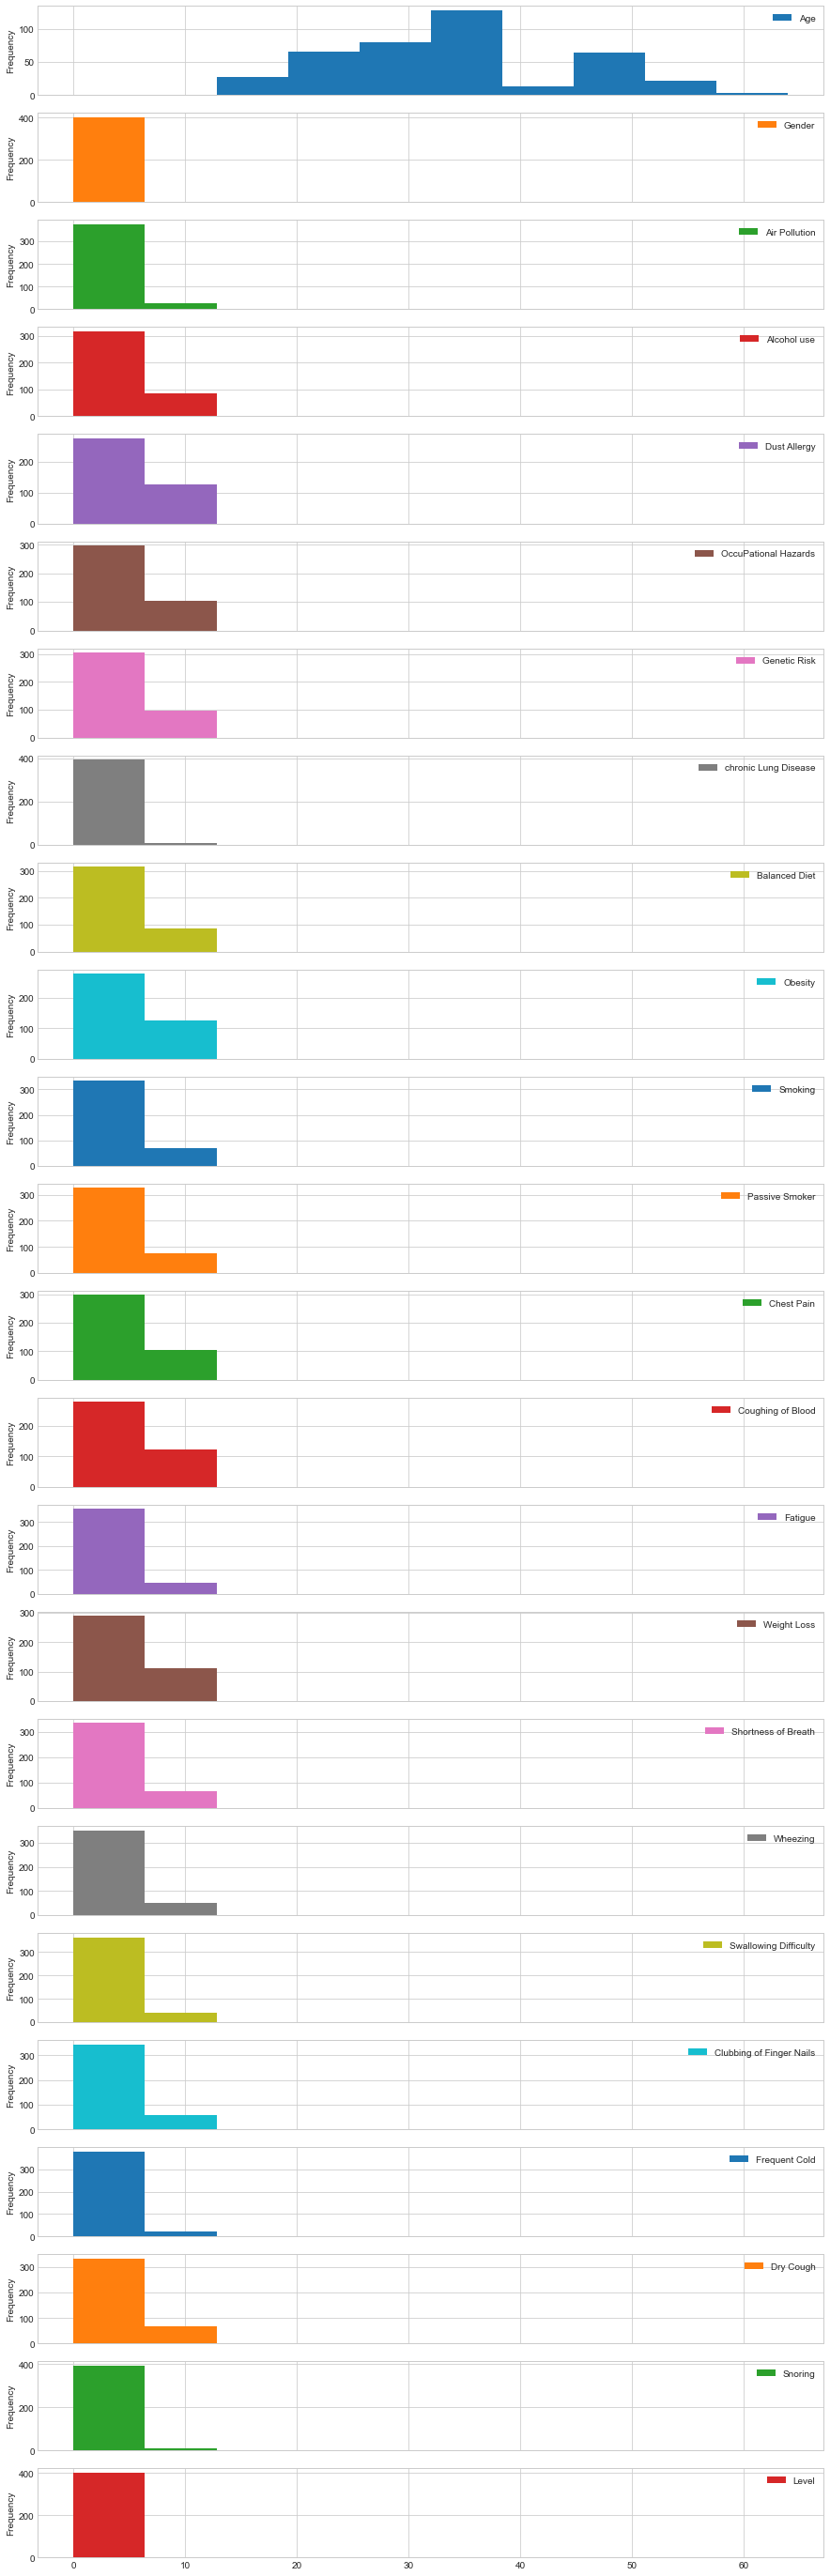

In [29]:
cancer_patient_female.plot.hist(figsize = (15, 50), subplots = True);

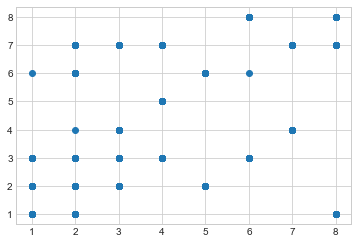

In [30]:
fig, ax = plt.subplots()
scatter = ax.scatter(x = cancer_patient_male["Alcohol use"], y = cancer_patient_male["Smoking"])
# cancer_patient_male.plot(x = cancer_patient_male["Alcohol use"], y = cancer_patient_male["Age"], kind = "scatter");

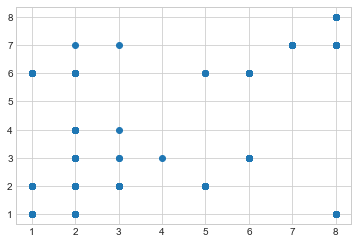

In [31]:
fig, ax = plt.subplots()
scatter = ax.scatter(x = cancer_patient_female["Alcohol use"], y = cancer_patient_female["Smoking"]);

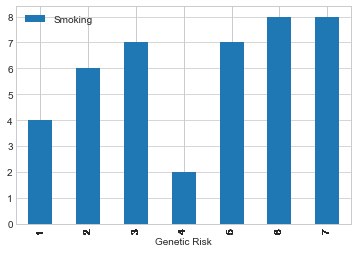

In [32]:
fig, ax = plt.subplots()
cancer_patient_male.plot(kind = "bar", x = "Genetic Risk", y = "Smoking", ax = ax);

In [33]:
len(cancer_patient_male), len(cancer_patient_female)

(598, 402)

In [34]:
cancer_patient.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


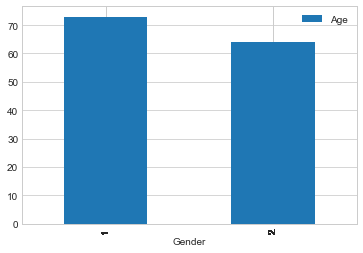

In [35]:
fig, ax = plt.subplots()
cancer_patient.plot(kind = "bar", x = "Gender", y = "Age", ax = ax);

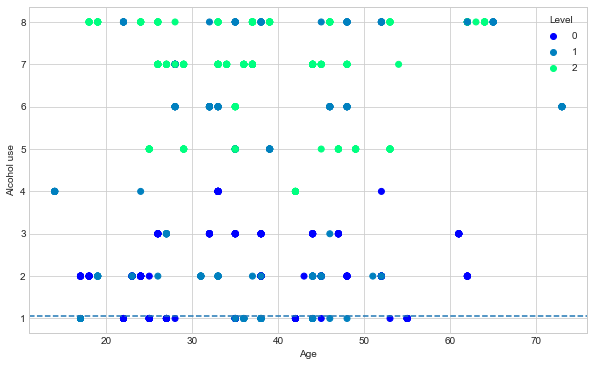

In [36]:
fig, ax = plt.subplots(figsize = (10, 6))
scatter = ax.scatter(x = cancer_patient["Age"], 
                     y = cancer_patient["Alcohol use"], 
                     c = cancer_patient["Level"], 
                     cmap = "winter")

ax.set(xlabel = "Age", 
       ylabel = "Alcohol use");

ax.legend(*scatter.legend_elements(), title = "Level");

ax.axhline(cancer_patient["Level"].mean(),
           linestyle = "--");

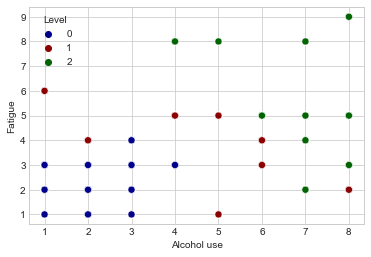

In [37]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Alcohol use',
                     y='Fatigue', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot

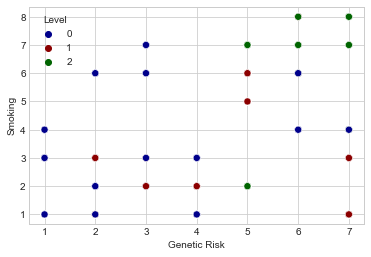

In [38]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Genetic Risk',
                     y='Smoking', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot

## Our data is analyzed and ready for Model Training and Machine Learning

In [39]:
cancer_patient.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [40]:
cancer_patient.drop(["Patient Id"], axis = 1, inplace= True)

In [41]:
cancer_patient.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


### Fitting the model/algorithm and use it to make predictions on our data.

#### First we use Support Vector Machine Estimator

In [42]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

sv = svm.SVC()
sv.fit(X_train, y_train)
sv.score(X_test, y_test)

0.96

In [43]:
y_preds = sv.predict(X_test)
y_preds[:10]

array([2, 0, 1, 0, 0, 2, 1, 0, 2, 2])

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        61
           1       0.90      0.97      0.93        59
           2       0.98      1.00      0.99        80

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [45]:
confusion_matrix(y_test, y_preds)

array([[55,  6,  0],
       [ 0, 57,  2],
       [ 0,  0, 80]], dtype=int64)

In [46]:
accuracy_score(y_test, y_preds)

0.96

### Checking accuracy with other model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

1.0

**So the result from KNeighborClassifier has increaed and we can clearly see the change**

#### Lastly we use RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

1.0

**Cross val for all the above algorithms to make sure for scores accuracy**

In [49]:
from sklearn.model_selection import cross_val_score

crossVal_sv = cross_val_score(sv, X, y)
crossVal_knn = cross_val_score(knn, X, y)
crossVal_rfr = cross_val_score(rfr, X, y)

print(f"For SupportVectorMachine: {crossVal_sv}, \nFor KNeighborClassifier: {crossVal_knn}, \nFor RandomForestRegressor: {crossVal_rfr}")

For SupportVectorMachine: [0.98  0.975 0.985 0.97  0.97 ], 
For KNeighborClassifier: [0.995 1.    1.    1.    0.995], 
For RandomForestRegressor: [1.         0.99996996 0.99999919 0.99999838 1.        ]


**Comparing `Score` results with `Cross Value Score`**

In [50]:
# For SupportVectorMachine

np.random.seed(42)

sv_single_score = sv.score(X_test, y_test)

sv_cross_val_score = np.mean(cross_val_score(sv, X, y))

sv_single_score, sv_cross_val_score

(0.97, 0.976)

In [51]:
# For KNeighborClassifier

np.random.seed(42)

knn_single_score = knn.score(X_test, y_test)

knn_cross_val_score = np.mean(cross_val_score(knn, X, y))

knn_single_score, knn_cross_val_score

(1.0, 0.998)

##### KNeighborClassifier almost giving 100% results

In [52]:
cancer_patient.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [53]:
cancer_patient_data = cancer_patient[["Age", "Gender", "Smoking", "Alcohol use", "Genetic Risk", "Level"]]
cancer_patient_data.head()

,Age,Gender,Smoking,Alcohol use,Genetic Risk,Level
0,33,1,3,4,3,0
1,17,1,2,1,4,1
2,35,1,2,5,5,2
3,37,1,7,7,6,2
4,46,1,8,8,7,2


In [54]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X = cancer_patient_data.drop(["Level"], axis = 1)
y = cancer_patient_data["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

sv_data = svm.SVC()
sv_data.fit(X_train, y_train)
sv_data.score(X_test, y_test)

0.76

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = cancer_patient_data.drop(["Level"], axis = 1)
y = cancer_patient_data["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn_data = KNeighborsClassifier()
knn_data.fit(X_train, y_train)
knn_data.score(X_test, y_test)

0.99

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x = cancer_patient_data.drop(["Level"], axis = 1)
y = cancer_patient_data["Level"]

rfr_data = RandomForestRegressor()
rfr_data.fit(X_train, y_train)
rfr_data.score(X_test, y_test)

0.9905222901278542

In [58]:
from tkinter import *
import matplotlib
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk

In [57]:
root = Tk()
root.mainloop()